In [8]:
import scanpy as sc # type: ignore
import pandas as pd # type: ignore
import numpy as np # type: ignore
import os

In [15]:
# adata = sc.read_h5ad("./input_data/adata_course_part1.h5ad") # VM
adata = sc.read_h5ad(os.path.normpath("../data/input_data/adata_course_part1.h5ad")) # Win

In [16]:
print(adata)

AnnData object with n_obs × n_vars = 14878 × 22546
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'fraction_mito', 'n_genes', 'num_spliced', 'num_ambiguous', 'num_unspliced', 'fraction_spliced', 'is_cell', 'is_high_quality', 'is_nonambient', 'is_not_debris', 'soupc_rho', 'sample'
    var: 'gene_ids', 'feature_types', 'soup_profile'
    layers: 'X_beforeAmbientRemoval', 'ambiguous', 'spliced', 'unspliced'


In [17]:
num_cells, num_genes = adata.X.shape # len 2
print(f"Number of Tent. Cells: {num_cells}\nNumber of Genes: {num_genes}")

Number of Tent. Cells: 14878
Number of Genes: 22546


In [28]:
# Test calling
display(adata.obs["sample"])
# adata.obs["sample"].size
adata.obs.shape

AAACCCAAGTTGGCGA-rd10    rd10
AAACCCACAGAAACCG-rd10    rd10
AAACCCAGTGCCGTAC-rd10    rd10
AAACCCATCGCGCCAA-rd10    rd10
AAACGAAAGCAACCAG-rd10    rd10
                         ... 
TTTGTTGAGCTCTTCC-wt        wt
TTTGTTGCATCTCCCA-wt        wt
TTTGTTGCATCTGTTT-wt        wt
TTTGTTGTCCAACTGA-wt        wt
TTTGTTGTCGAACACT-wt        wt
Name: sample, Length: 14878, dtype: category
Categories (2, object): ['rd10', 'wt']

(14878, 15)

In [39]:
samples = (adata.obs["sample"]
           .value_counts()
           .divide(adata.obs["sample"].size)
           .multiply(100))

with pd.option_context("display.float_format","{:,.2f}% of samples".format):
    display(samples)
    # print(samples)

wt     53.77% of samples
rd10   46.23% of samples
Name: sample, dtype: float64

In [40]:
adata.obs["X_sum"] = adata.X.sum(axis=1)

Text(0.5, 1.0, 'Total Number of Counts by Cell')

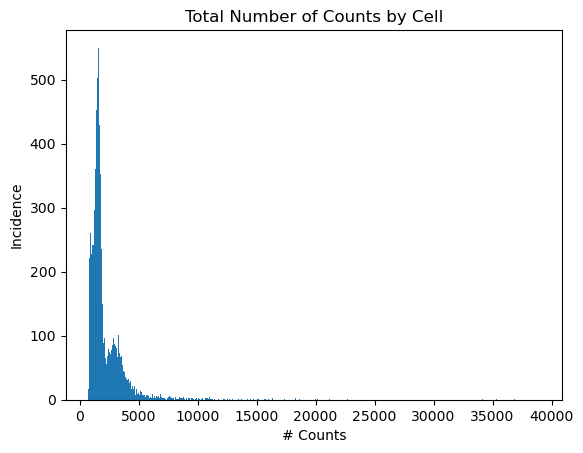

In [42]:
import matplotlib.pyplot as plt # type: ignore

plt.hist(adata.obs["X_sum"],bins=1000)
plt.xlabel("# Counts")
plt.ylabel("Incidence")
plt.title("Total Number of Counts by Cell")
